# STAT 201 Project Proposal: Violent Crime Incidents in three Vancouver Neighbourhoods

### Group 37: Elias Khan, Weihao (Beren) Sun, Elaine Zhou, Nika Martinussen

## Introduction

Understanding how crime incidences vary by geographic region is an ongoing area of study by researchers. This report looks at the incidence of violent crime activity within different communities of Vancouver, a populous city in British Columbia, Canada.

An examination of violent crimes in Vancouver in 1996, found that the highest rates of violent crimes were concentrated in the Downtown Eastside and surrounding neighbourhoods, with violent crime rates decreasing as one moved further away from this epicenter (Andreson, 2017). Further, between 2001 and 2008 in Vancouver, geographic hotspots for violent trauma incidents were identified to be the Downtown and Downtown Eastside neighbourhoods (Walker et. al., 2014).

In this report, we are seeking to answer the question: between Point Grey, Kitsilano, and the Central Business District, how does geographic location affect violent crime incidents?

To answer this question, we will use the Vancouver Crime Dataset released by Vancouver Police Department (VPD) as the sample. The dataset describes the type of crime, along with the location and time that the crime occurred, across ten variables.

We will be calculating two quantities of interest to answer this question: the median yearly proportion of violent crime in each neighbourhood between the years of 2003 - 2021, and the mean yearly count of violent crime in each neighbourhood between the years of 2003 - 2021.

## Data Analysis

### Proportion of Violent Crimes in Each Neighbourhood

The first parameter that we are going to calculate is the yearly proportion of violent crimes across three Vancouver neighbourhoods, West Point Grey, Kitsilano, and the Central Business District.

Since the Vancouver Crime data set is constantly changing, the website allows users to customize what data they want to take from the larger data base.

This brings up an issue of not being able to reproduce our data without putting in the exact same data that we have used. To deal with this issue we have put our data set on GitHub where individuals who question our methods and want to reproduce our results may do so.

Here's the link to find the data set: https://github.com/sasiburi/STAT201-Group37

We must first load in the libraries that we need and the data set.

In [ ]:
library(tidyverse)

#Load and read data

crime_all_years <- read_csv("https://raw.githubusercontent.com/sasiburi/STAT201-Group37/main/crimedata_csv_AllYears.csv") %>%
  filter(!is.na(NEIGHBOURHOOD))

Then we must categorize all of the crimes into either violent or non violent

In [ ]:
#Filter and process data

violent_crime_years <- crime_all_years %>%
    mutate(Violent = ifelse((TYPE != "Offence Against a Person" & TYPE != "Homicide"), FALSE, TRUE)) %>%
    select(Violent, YEAR, NEIGHBOURHOOD) %>%
    filter(YEAR != 2022)

Now we can calculate the proportion of crimes which are violent for each year in the given neighborhoods.

In [ ]:
#Calculate proportion of violent crimes for each neighbourhood for each year

crime_proportions <- violent_crime_years %>%
              group_by(YEAR, NEIGHBOURHOOD) %>%
              summarize(Violent_Crime_Proportion = sum(Violent == TRUE)/n())
head(crime_proportions)

In [ ]:
#Create plots of sampling distributions

Point_Grey_Prop <- crime_proportions %>%
  filter(NEIGHBOURHOOD == "West Point Grey") %>%
  ggplot(aes(x = Violent_Crime_Proportion)) +
  geom_histogram(binwidth = 0.005, colour = "white") +
    xlab("Proportion of Reported Violent Crimes") +
    ggtitle("Sampling Distribution of the Proportion of Reported Violent Crimes in West Point Grey") +
    theme(text = element_text(size=15))

Kitsilano_Prop <- crime_proportions %>%
  filter(NEIGHBOURHOOD == "Kitsilano") %>%
  ggplot(aes(x = Violent_Crime_Proportion)) +
  geom_histogram(binwidth = 0.0025, colour = "white") +
    xlab("Proportion of Reported Violent Crimes") +
    ggtitle("Sampling Distribution of the Proportion of Reported Violent Crimes in Kitsilano") +
    theme(text = element_text(size=15))

CBD_Prop <- crime_proportions %>%
  filter(NEIGHBOURHOOD == "Central Business District") %>%
  ggplot(aes(x = Violent_Crime_Proportion)) +
  geom_histogram(binwidth = 0.005, colour = "white") +
    xlab("Proportion of Reported Violent Crimes") +
    ggtitle("Sampling Distribution of the Proportion of Reported Violent Crimes in the Central Business District") +
    theme(text = element_text(size=15))

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)
Point_Grey_Prop

*Figure 1: Sampling Distribution of the Proportion of Reported Violent Crimes in West Point Grey*

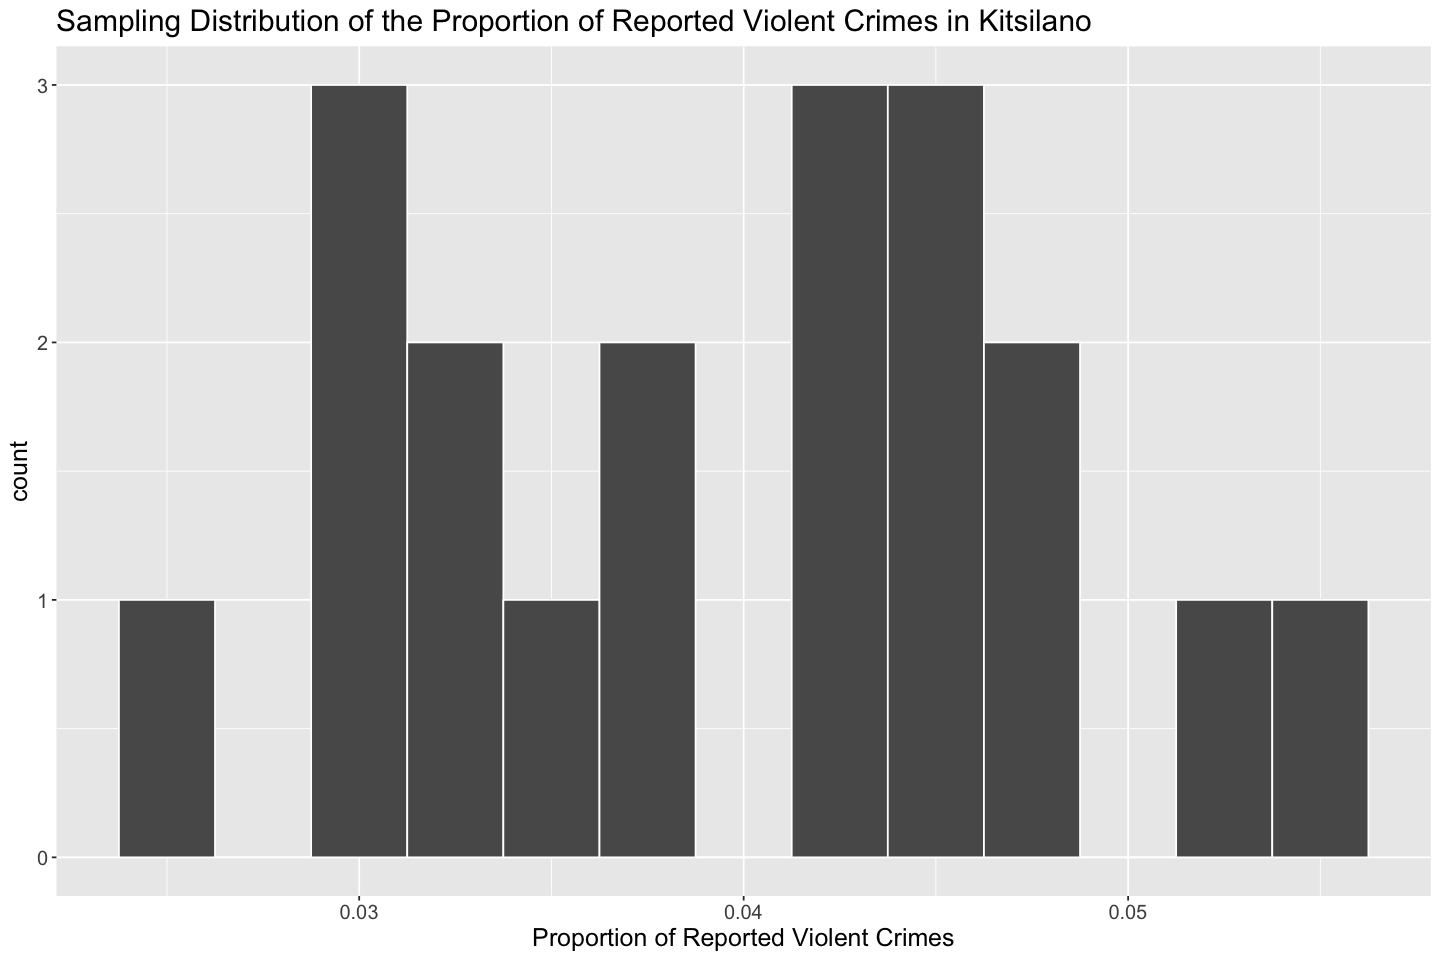

In [75]:
options(repr.plot.width = 12, repr.plot.height = 8)
Kitsilano_Prop

*Figure 2: Sampling Distribution of the Proportion of Reported Violent Crimes in Kitsilano*

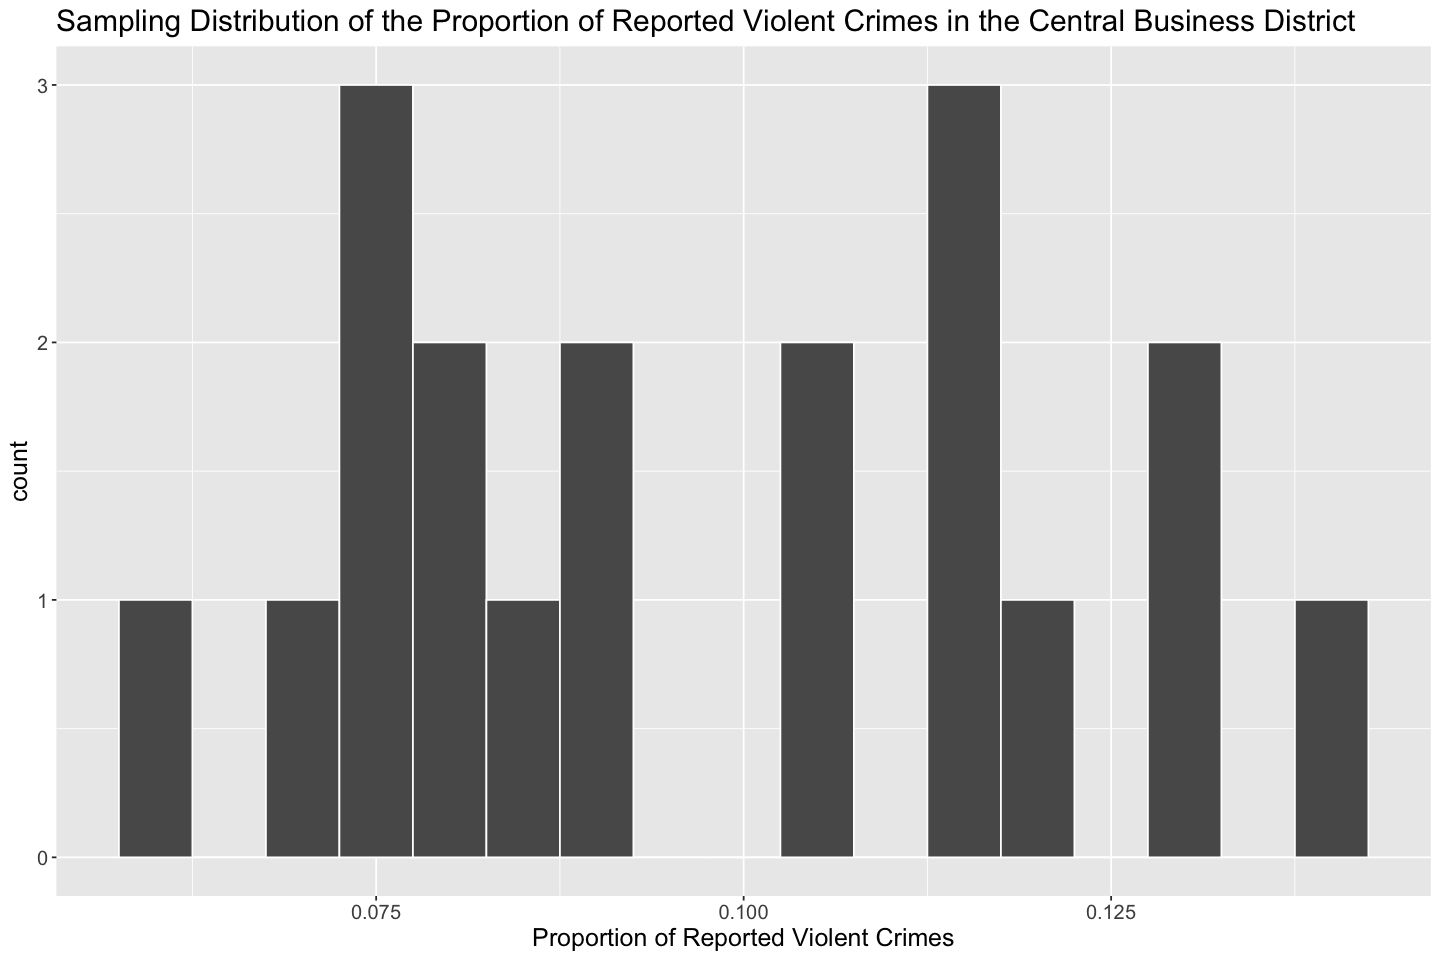

In [76]:
options(repr.plot.width = 12, repr.plot.height = 8)
CBD_Prop

*Figure 3: Sampling Distribution of the Proportion of Reported Violent Crimes in the Central Business District*

In [77]:
#Calculate median proportion of violent crime for each neighbourhood

median_violent_crime_proportions <- crime_proportions %>%
    group_by(NEIGHBOURHOOD) %>%
    summarize(Median_Proportion = median(Violent_Crime_Proportion))

#Create a visualization

Crime_median_proportion_plot<- median_violent_crime_proportions %>%
             ggplot(aes(x = reorder(NEIGHBOURHOOD, -Median_Proportion), y = Median_Proportion)) +
             geom_bar(stat = 'identity') +
             xlab("Neighourhood") +
             ylab("Median Proportion of Violent Crimes per Year from 2003 - 2021") +
             ggtitle("Comparison of the median proportion of violent crimes per year in Vancouver neighbourhoods between 2003 and 2021") +
             theme(text = element_text(size=15)) +
             coord_flip()

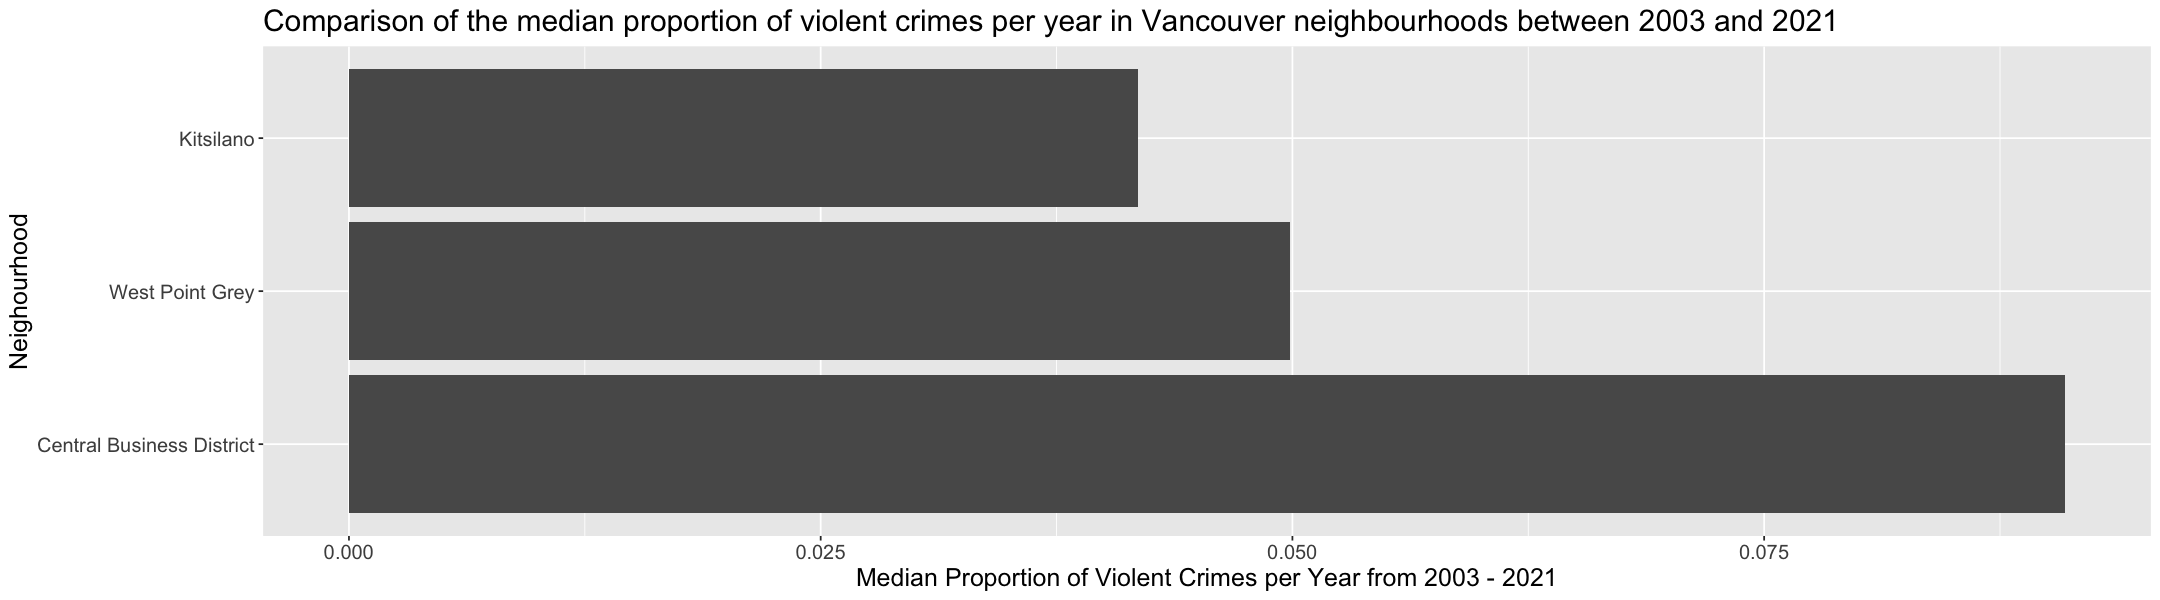

In [78]:
options(repr.plot.width = 18, repr.plot.height = 5)
Crime_median_proportion_plot

*Figure 4: Comparison of the median proportion of violent crimes per year in Vancouver neighbourhoods between 2003 and 2021*

In [79]:
median_violent_crime_proportions

NEIGHBOURHOOD,Median_Proportion
<chr>,<dbl>
Central Business District,0.09094776
Kitsilano,0.04181390
West Point Grey,0.04988662


*Table 1: Median violent crime proportions per year in Point Grey, Kitsilano, and the Central Business District between 2003 and 2021*

### Yearly Mean of Violent Crimes in Each Neighbourhood 

The second parameter that we are going to calculate is the mean yearly amount of violent crimes across three Vancouver neighbourhoods, West Point Grey, Kitsilano, and the Central Business District.

In [80]:
#Sum amount of violent crimes for each neighbourhood for each year

violent_crime_sum <- violent_crime_years %>%
    group_by(YEAR, NEIGHBOURHOOD) %>%
    summarize(Violent_Crime_Incidents = sum(Violent == TRUE))

#Calculate mean of violent crimes per year in each neighbourhood

violent_crime_mean <- violent_crime_sum %>%
    group_by(NEIGHBOURHOOD) %>%
    summarize(Mean = mean(Violent_Crime_Incidents))

`summarise()` has grouped output by 'YEAR'. You can override using the `.groups` argument.



In [81]:
#Create plots of sampling distributions

Point_Grey <- violent_crime_sum %>%
  filter(NEIGHBOURHOOD == "West Point Grey") %>%
  ggplot(aes(x = Violent_Crime_Incidents)) +
  geom_histogram(binwidth = 5, colour = "white") +
    xlab("Number Yearly of Reported Violent Crimes") +
    ggtitle("Sampling Distribution of Yearly Reported Violent Crimes in West Point Grey") + 
    theme(text = element_text(size=15))

Kitsilano <- violent_crime_sum %>%
  filter(NEIGHBOURHOOD == "Kitsilano") %>%
  ggplot(aes(x = Violent_Crime_Incidents)) +
  geom_histogram(binwidth = 5, colour = "white") +
    xlab("Number Yearly of Reported Violent Crimes") +
    ggtitle("Sampling Distribution of Yearly Reported Violent Crimes in Kitsilano") + 
    theme(text = element_text(size=15))

CBD <- violent_crime_sum %>%
  filter(NEIGHBOURHOOD == "Central Business District") %>%
  ggplot(aes(x = Violent_Crime_Incidents)) +
  geom_histogram(binwidth = 40, colour = "white") +
    xlab("Number Yearly of Reported Violent Crimes") +
    ggtitle("Sampling Distribution of Yearly Reported Violent Crimes in the Central Business District") + 
    theme(text = element_text(size=15))

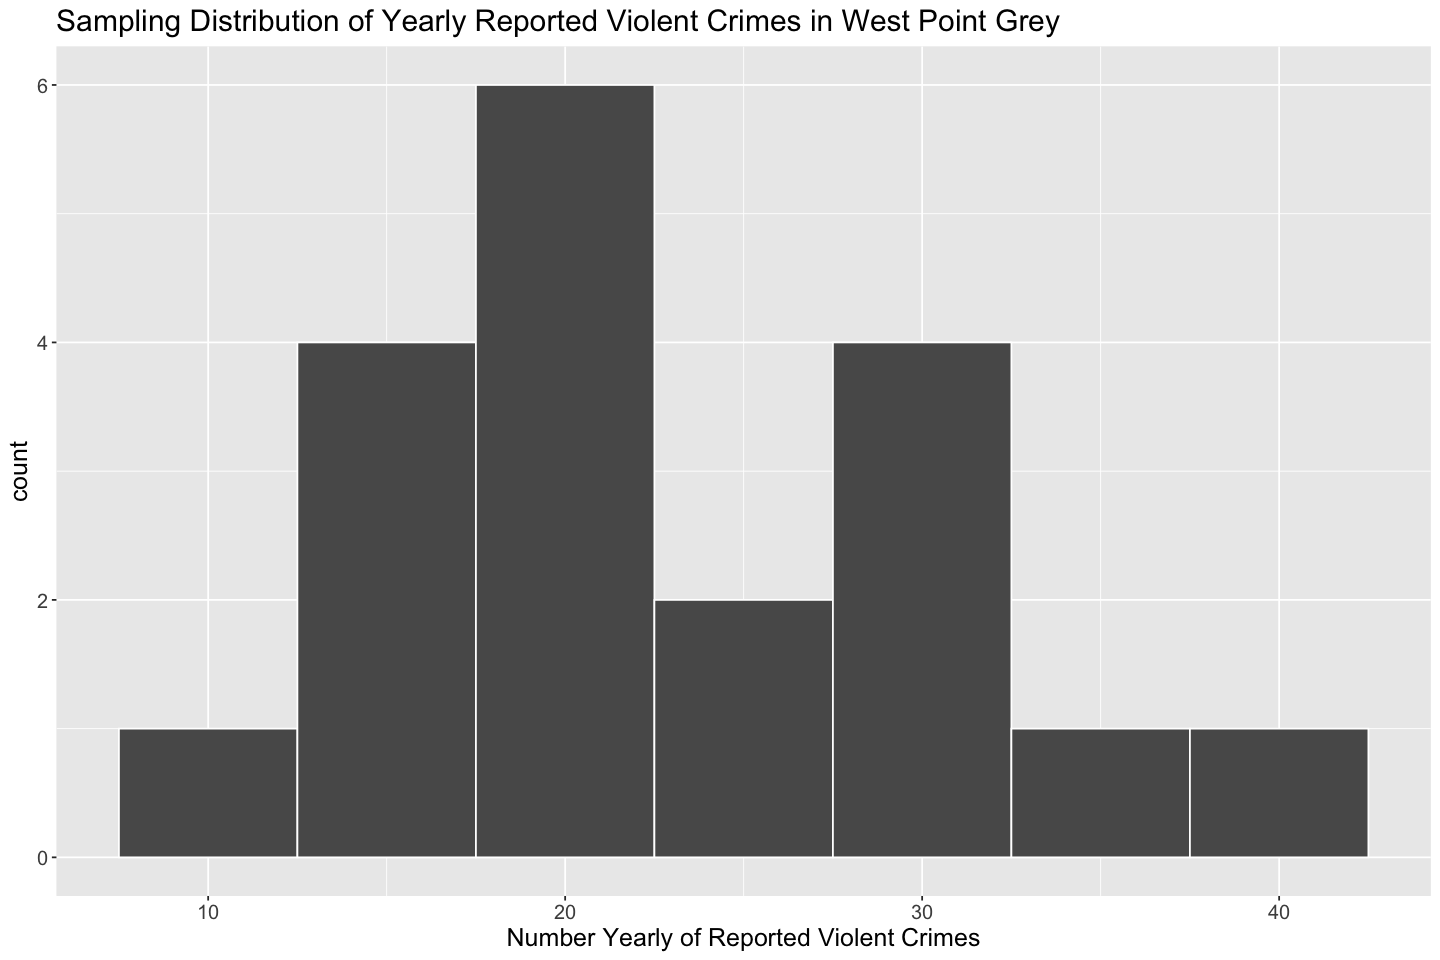

In [82]:
options(repr.plot.width = 12, repr.plot.height = 8)
Point_Grey

*Figure 5: Sampling Distribution of Yearly Reported Violent Crimes in Point Grey*

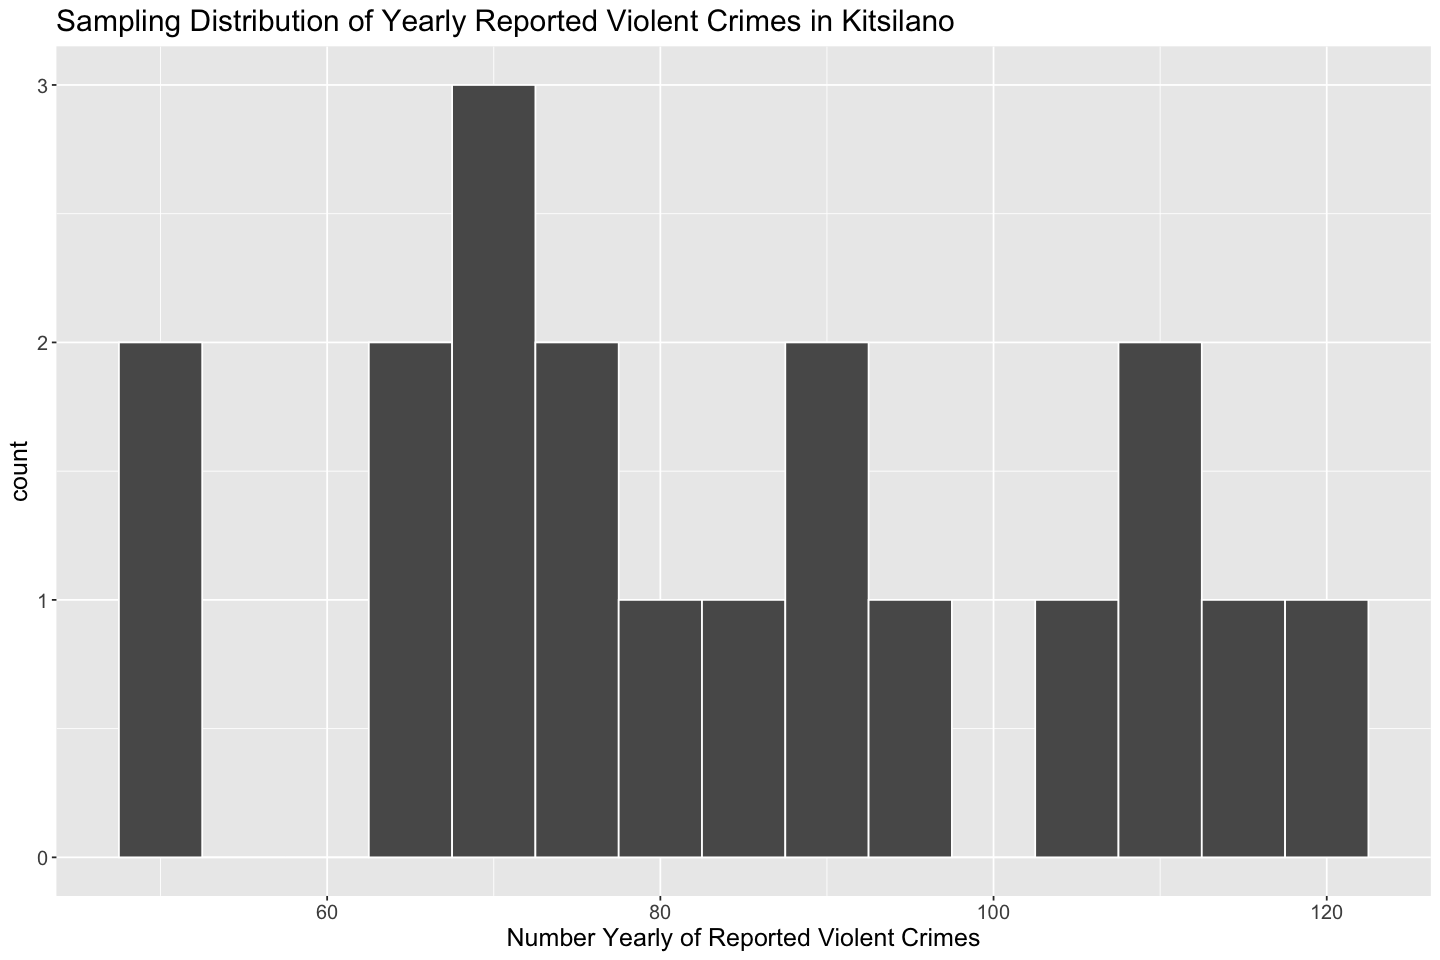

In [83]:
options(repr.plot.width = 12, repr.plot.height = 8)
Kitsilano

*Figure 6: Sampling Distribution of Yearly Reported Violent Crimes in Kitsilano*

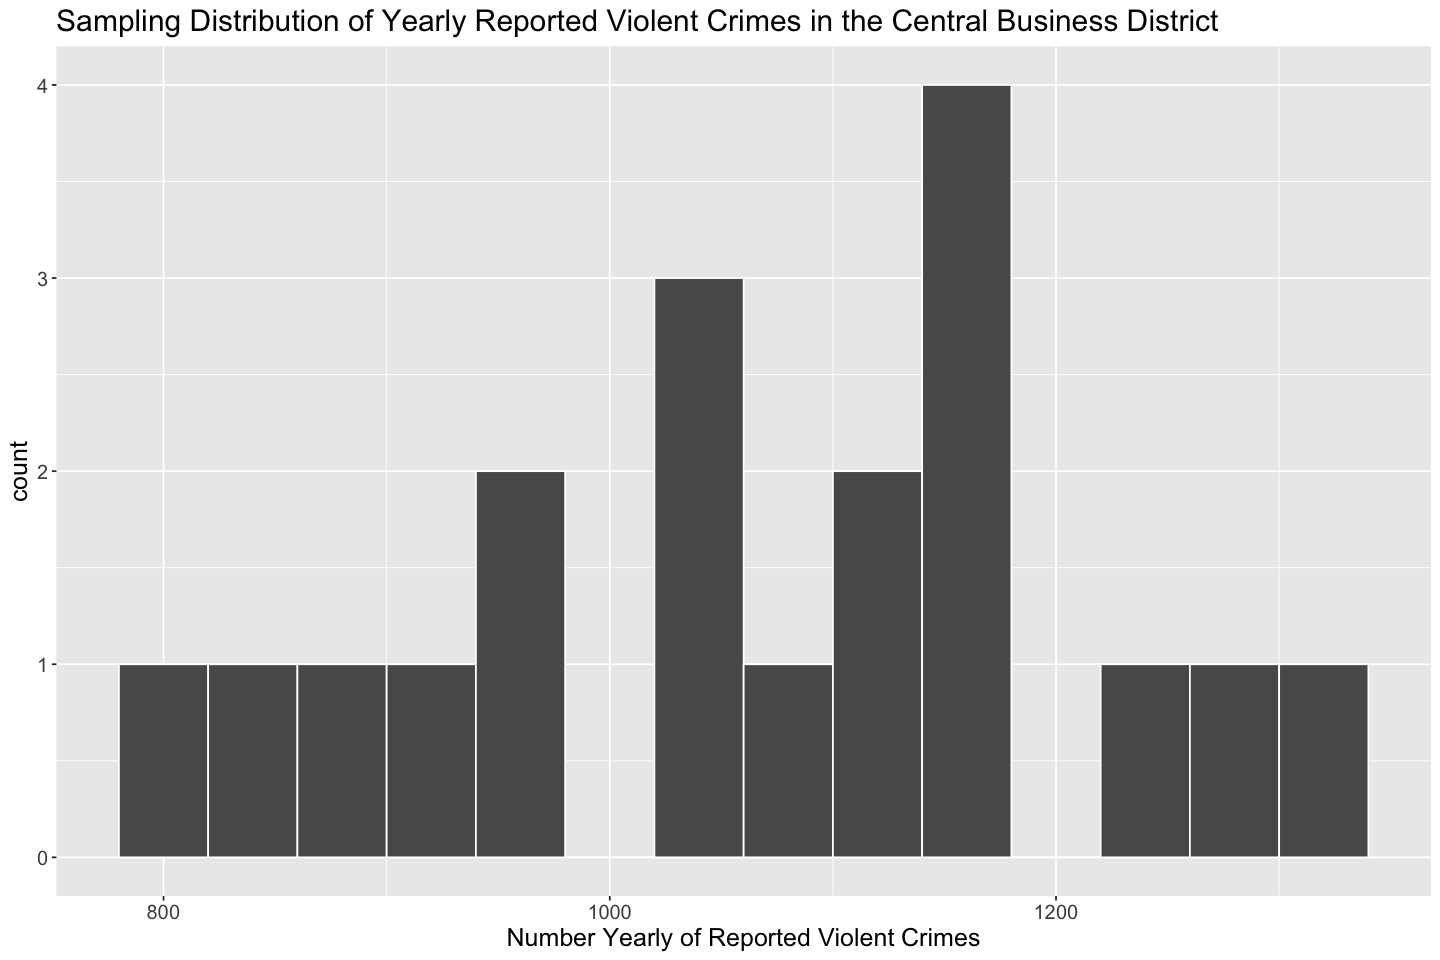

In [84]:
options(repr.plot.width = 12, repr.plot.height = 8)
CBD

*Figure 7: Sampling Distribution of Yearly Reported Violent Crimes in the Central Business District*

In [85]:
#Create a plot to demonstrate results

Crime_mean_plot<- violent_crime_mean %>%
             ggplot(aes(x = reorder(NEIGHBOURHOOD, -Mean), y = Mean)) +
             geom_bar(stat = 'identity') +
             xlab("Neighourhood") +
             ylab("Mean amount of violent crimes over 2003 - 2021") +
             ggtitle("Comparison of the mean amount of violent crimes per year in Vancouver neighbourhoods between 2003 and 2021") +
             theme(text = element_text(size=15)) +
             coord_flip()

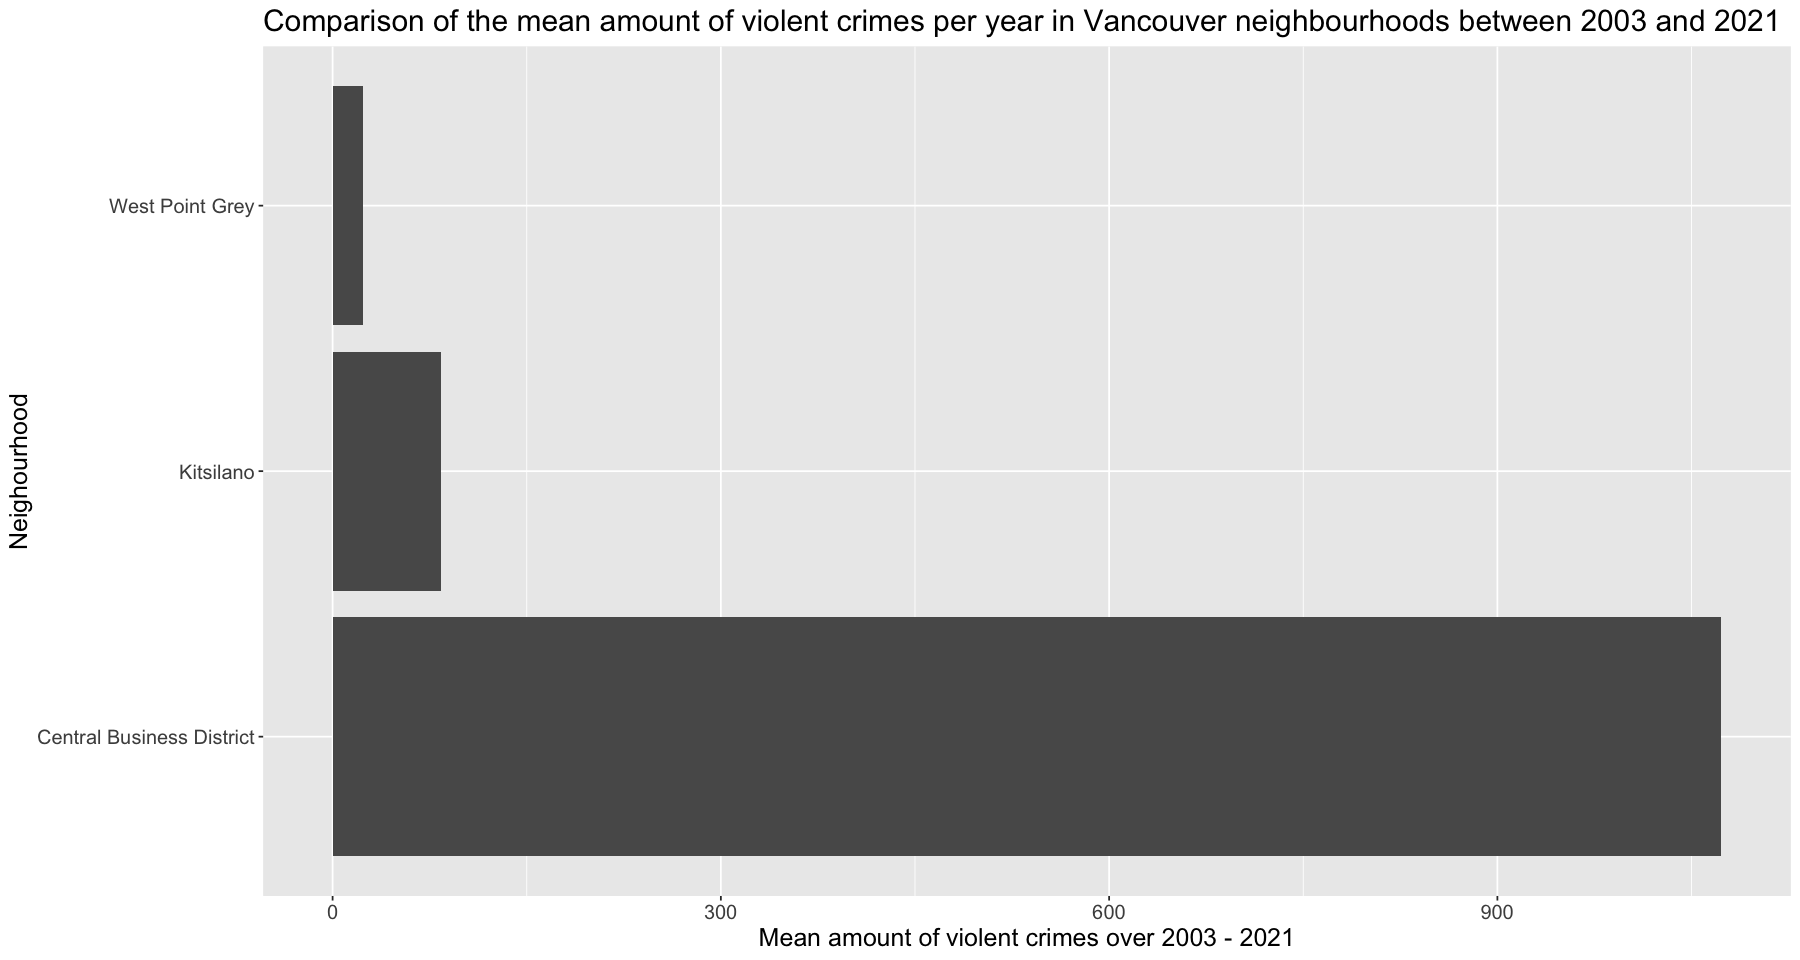

In [86]:
options(repr.plot.width = 15, repr.plot.height = 8)
Crime_mean_plot

*Figure 8: Comparison of the mean amount of violent crimes per year in Vancouver neighbourhoods between 2003 and 2021*

In [87]:
violent_crime_mean

NEIGHBOURHOOD,Mean
<chr>,<dbl>
Central Business District,1073.10526
Kitsilano,83.89474
West Point Grey,23.21053


*Table 2: Mean amount of violent crimes per year in Point Grey, Kitsilano, and the Central Business District between 2003 and 2021*

## Methods

The current analysis of the data set demonstrates several strengths. To begin, the calculation of the parameters were done using a reproducible data science workflow, promoting the trustworthiness of the results of our analysis.

This dataset does not represent the entire population of crimes in Vancouver, as not all crimes committed are reported to police authorities. However, the dataset was collected in an unbiased manner, promoting further trust in our results. 

Since the dataset represents a sample of all crimes committed in Vancouver, we cannot confidently say that our results truly reflect the population. There may be some error in our analysis since we only examined a subset of the population, and therefore, we need to quantify the error that was introduced into the calculated parameters. 

To quantify the error that may be present within our analysis, we will calculate the following:

- 90% confidence interval of each parameter
- Hypothesis test that the further a community is from the Central Business District, the lower their mean yearly amount of violent crime incidents. West Point Grey is further than Kitsilano from the Central Business District, and from our initial results, has a lower yearly mean of violent crime.

From the preliminary data analysis, we expect to find that the further a neighbourhood is from the Central Business District, the lower the amount of violent crime it has. In identifying neighbourhoods with the greatest proportion of crimes, we can research what are common social determinants in Vancouver neighbourhoods that cause higher incidences of violent crime. The impacts of these findings can aid policy makers and community leaders in crafting interventions to reduce crime in these neighbourhoods, and create safer communities. 


## References

Andresen, M. (2006). A spatial analysis of crime in Vancouver, British Columbia: A synthesis of social disorganization and routine activity theory. The Canadian Geographer / Le Géographe Canadien, 50(4), 487–502. https://doi.org/10.1111/j.1541-0064.2006.00159.x 

Vancouver Police Department. (2022). Vancouver crime data [Data file]. Retrieved from https://geodash.vpd.ca/opendata/#

Walker, B. B., Schuurman, N., &amp; Hameed, S. M. (2014). A GIS-based spatiotemporal analysis of violent trauma hotspots in Vancouver, Canada: Identification, contextualisation and intervention. BMJ Open, 4(2). https://doi.org/10.1136/bmjopen-2013-003642 